Reads the data from the excel file and organizes it into a readable list

In [2]:
import csv

features, salaries=[], []
headers = {}

def read_data_from_excel(file_path='/Users/shawnwinston/Desktop/ece_143/Train_rev1_salaries.csv'):
    '''
    reads raw data from an execl file and stores it in a dxn list
    where n is the number of data examples and d is the number
    of categories

    input: file name of where to read data from

    output:nxd list of extracted raw data

    '''

    assert isinstance(file_path, str)

    print "Reading data..."

    with open(file_path) as data:
        data_csv = csv.reader(data)

        header = data.readline().split(',')
        #these are the categories
        # ['Id', 'Title', 'FullDescription', 'LocationRaw', 'LocationNormalized', 'ContractType', 'ContractTime', 'Company', 'Category', 'SalaryRaw', 'SalaryNormalized', 'SourceName\r\n']

        i=0
        for name in header:
            headers[name] = i
            i+=1

        lines = [x for x in data_csv]

        for l in lines:
            features.append(l[0:9]+[l[11]])
            salaries.append(float(l[10]))

    print "done"

    #Can access each feature by name instead of number using below syntax
    #print features[0][categories['Id']]




SyntaxError: Missing parentheses in call to 'print'. Did you mean print(int "Reading data...")? (<ipython-input-2-c70da0c17f56>, line 20)

Calculates the salary per whatever catergory you provide to the function. For example will compute the average salary
and max salary for locations. It will also print out the top 20 in terms of frequencyf or that category. Ex: Top 20
job categories.

Example output of number of job listings for the top 20 companies:

{'': 32430, 'Hays': 1784, 'Perfect Placement': 865, 'JOBG8': 841, 'Penguin Recruitment': 752, 'Page Personnel Finance': 536, 'UKStaffsearch': 4997, 'Michael Page Finance': 634, 'Randstad': 748, 'London4Jobs': 2345, 'BMS Sales Specialists LLP': 559, 'Adecco': 701, 'CVbrowser': 2977, 'JAM Recruitment Ltd': 1122, 'Office Angels': 961, 'Jobsite Jobs': 932, 'ARRAY': 847, 'COREcruitment International': 551, 'Adecco Group': 592, 'Matchtech Group plc.': 834}


In [ ]:


def salary_per_category(category_name):
    '''
    Gets average salary data and max salary data for desired catergory_name

    input: the category name you wish to see salary data for ex: location, company, job title, etc.

    output: average_category_salary - dictonary that stores the average salary data per category values
            max_category_salary - dictonary that stores the max salary data per category values
    '''

    from collections import defaultdict
    import operator

    assert isinstance(category_name, str)
    assert category_name in headers

    category_salaries = defaultdict(list)
    average_category_salaries = {}
    max_category_salary = {}
    top_20 = {}

    #create dictonary of lists that stores all the salary values for each category value
    for i in range(len(salaries)):
        category_salaries[features[i][headers[category_name]]].append(salaries[i])

    sorted_category_salaries = sorted(category_salaries.items(), key=lambda x: len(x[1]), reverse=True)

    #print number of listings in each category for top 20
    for i in range(20):
        top_20[sorted_category_salaries[i][0]] = len(sorted_category_salaries[i][1])
        #print sorted_category_salaries[i][0], len(sorted_category_salaries[i][1])

    #Calculate average and max salary for each category value
    for key in category_salaries.keys():
        #print key, len(category_salaries[key])
        if len(category_salaries[key]) > 4:
            average_category_salaries[key] = sum(category_salaries[key])/len(category_salaries[key])
        max_category_salary[key] = max(category_salaries[key])

    #print average_category_salaries
    #print max_category_salary

    sorted_average_category_salaries = sorted(average_category_salaries.items(), key=lambda x: x[1])
    sorted_max_category_salaries = sorted(max_category_salary.items(), key=lambda x: x[1])

    print sorted_average_category_salaries[-5:]
    print sorted_max_category_salaries[-5:]

    #all categories in dataset
    #print category_salaries.keys()

    print top_20
    return average_category_salaries, max_category_salary, top_20


#average salary of all jobs
def average_salary():
    '''

    :return: average salary of all jobs in dataset
    '''

    print sum(salaries)/len(salaries)


def predict_company_category(n):
    '''
    predicts the type of company based off of the category of job listings
    :param n: number of companies in dataset that we want to predict for
    :return: dictonary of companies and their predicted category
    '''

    from collections import defaultdict

    assert isinstance(n,int)
    assert n > 0

    companies = defaultdict(list)
    predictions = {}

    # create dictonary of lists that stores all the salary values for each category value
    for i in range(len(salaries)):
        companies[features[i][headers['Company']]].append(features[i][headers['Category']])

    sorted_company_category = sorted(companies.items(), key=lambda x: len(x[1]), reverse=True)
    top_company_category = dict(sorted_company_category[1:n])

    #adds up all the categories for a specific and determines which category has the most and predicts that as
    #the category for the company
    for key in top_company_category.keys() :
        category_dict = {}
        for cat in top_company_category[key]:
            if cat in category_dict.keys():
                category_dict[cat] += 1

            else:
                category_dict[cat] = 0

        #print max(category_dict, key=category_dict.get)
        predictions[key] = max(category_dict, key=category_dict.get)

    #print predictions
    return predictions

####### MAIN LOOP ########

read_data_from_excel()
avg_salary_dict, max_salary_dict, top_20 = salary_per_category('Company')

average_salary()
predictions = predict_company_category(20)
visualize_data('Category of Job', "Number of Job Listings", "Number of Job Listings Per Category", top_20)

#maybe find job Titles with the top salaries
header_truncated = ['Title', 'LocationNormalized', 'Company', 'Category']
#for name in header_truncated:
#    avg_salary_dict, max_salary_dict, top_20 = salary_per_category(name)
#    visualize_salary_data() #visual average salary data
#    visualize_salary_data() #visualize max salary data

Visualizes the average salary data with bar charts


In [8]:
def visualize_data(x_label, y_label, title, data):
    '''
    Makes a bar chart and visualizes the job data that is passed to it

    :param x_label: str to put on x_axis
    :param y_label: str to put on y_axis
    :param title: str to put as title
    :param data: data to display on graph

    '''

    import numpy as np

    assert isinstance(data, dict)
    assert isinstance(x_label,str)
    assert isinstance(y_label,str)
    assert isinstance(title,str)

    import matplotlib.pyplot as plt

    my_colors = [(0.2, 0.4, 0.5), (0.2, 0.75, 0.25)]
    width=0.5

    sorted_data = sorted(data.items(), key=lambda x: x[1], reverse=True)
    unzipped_sorted_data = zip(*sorted_data)

    plt.figure(figsize=(12,8))
    indices = np.arange(len(data.keys()))
    fig = plt.bar(indices, unzipped_sorted_data[1], width, color=my_colors)
    plt.xticks(indices, unzipped_sorted_data[0], rotation='vertical')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

    #put label above each bar on chart
    rects = fig.patches
    for rect,label in zip(rects,unzipped_sorted_data[1]):
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2, height+5, label, ha='center', va='bottom')
    plt.show()
    

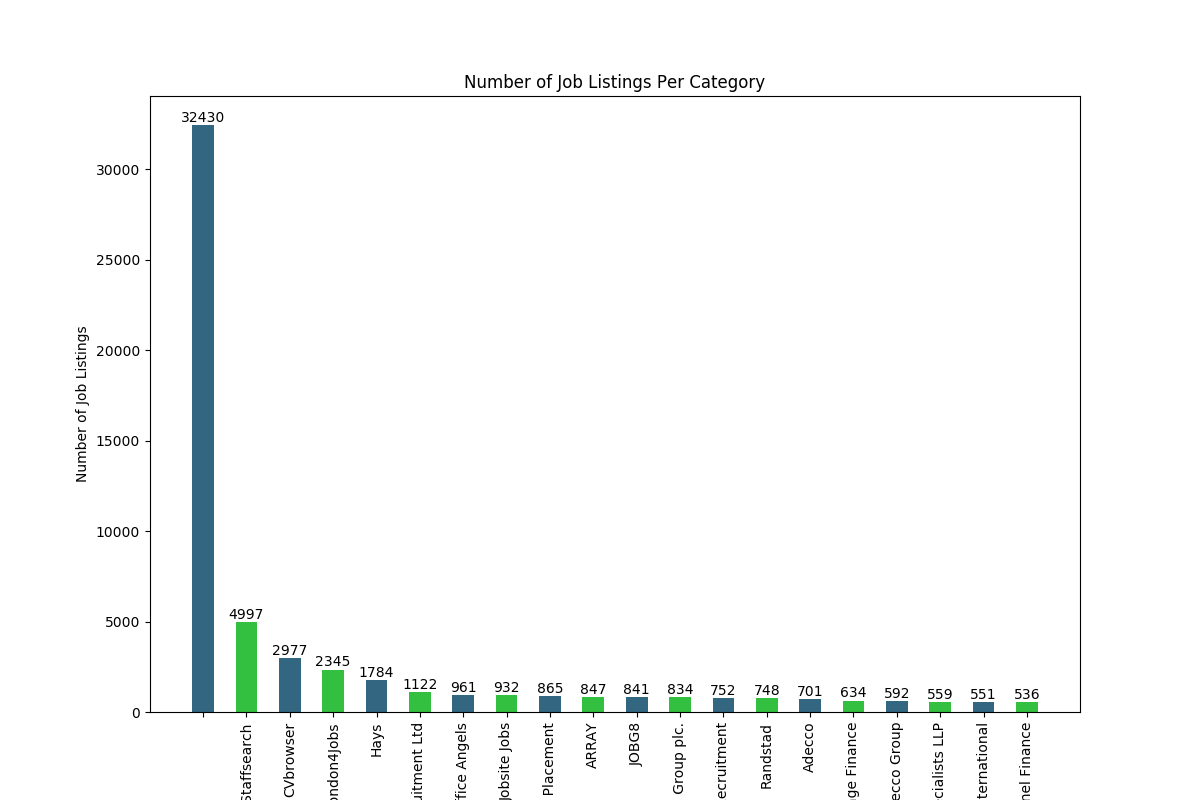

In [11]:
from IPython.display import Image
Image(filename='Figure_2.png')

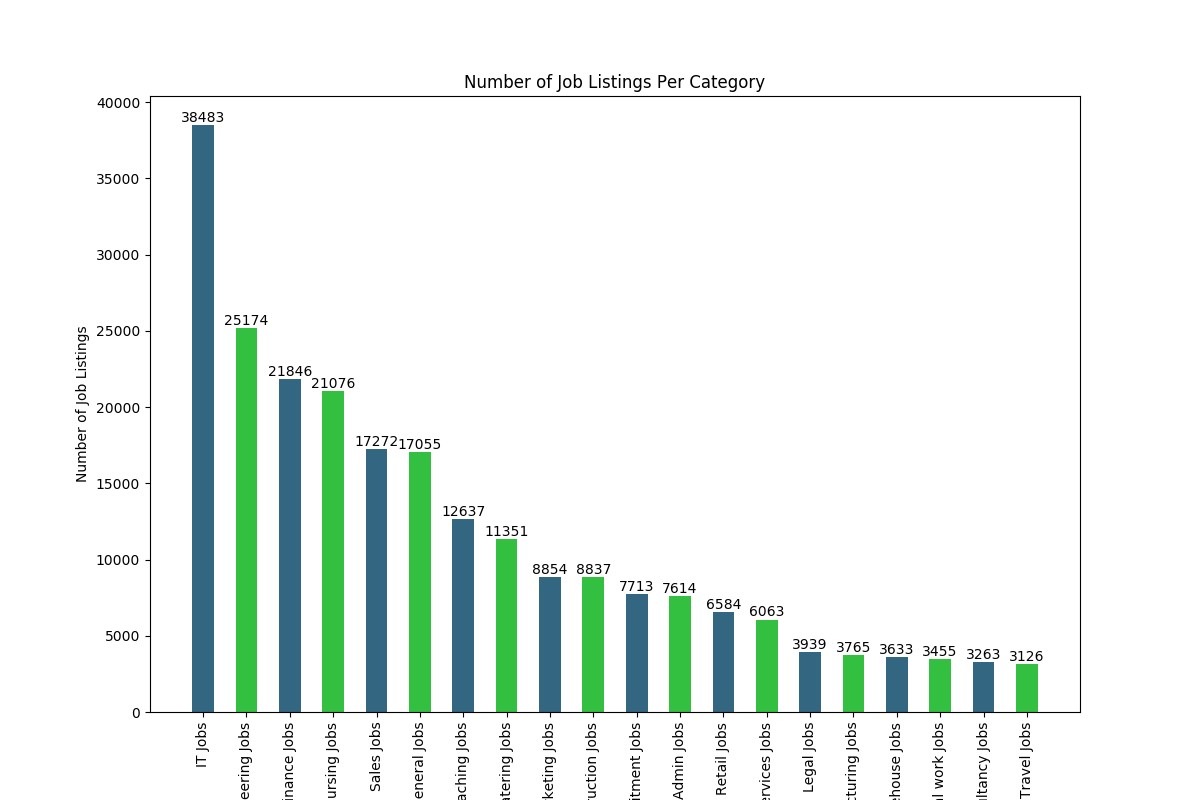

In [12]:
Image(filename='Figure_1.png')
